In [2]:
!pip install pandas

     |████████████████████████████████| 11.7 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 75.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

In [4]:
ds = pd.Series([1.0, 3.5, 4.6, 7.8])

In [5]:
ds

0    1.0
1    3.5
2    4.6
3    7.8
dtype: float64

In [6]:
ds[0]

1.0

In [8]:
import numpy as np

In [9]:
np.random.randn(10)

array([-0.56339937,  2.29493084,  1.06856345,  0.24099478,  0.33865016,
       -0.08693645,  0.05616441,  0.02538047, -0.59827579, -0.40968278])

In [15]:
np.random.randn(10)*5 + 25

array([21.87501764, 27.35606538, 17.17742109, 17.71951383, 35.78454849,
       28.44299078, 21.32205527, 26.40881737, 30.10600969, 14.56606836])

In [150]:
df = pd.DataFrame( {"names":["Jim", "Jane", "Alice", "Bob", "Ekman", "Munk", "Nansen", "Tharp", "McBoaty", "Earle"], "age":np.random.randn(10)*5 + 25, "weight":np.random.randn(10)*5 + 65, 
                    "university":["Unseen", "Gothenburg", "Hogwarts", "Gothenburg", "Unseen", "Unseen", "Hogwarts", "Gothenburg", "Unseen", "Unseen"]}, 
                   index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

In [151]:
df

,names,age,weight,university
A,Jim,22.900067,62.468178,Unseen
B,Jane,19.019610,59.159844,Gothenburg
C,Alice,26.479039,67.738044,Hogwarts
D,Bob,29.184599,66.660857,Gothenburg
E,Ekman,23.507917,68.517867,Unseen
F,Munk,31.637441,69.038631,Unseen
G,Nansen,24.986297,62.596979,Hogwarts
H,Tharp,29.666064,60.721719,Gothenburg
I,McBoaty,35.201822,68.192340,Unseen
J,Earle,26.654930,69.257401,Unseen


In [152]:
df.columns

Index(['names', 'age', 'weight', 'university'], dtype='object')

In [153]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [99]:
df.loc[["A","J"]]

,names,age,weight,university
A,Jim,17.862022,67.493954,Unseen
J,Earle,21.545533,58.897520,Unseen


#### Defining your own index, rather than the default index of 0...N may be useful when you need to organize data logically, for example time series data can use the time as index

In [100]:
df.iloc[[0,9]]

,names,age,weight,university
A,Jim,17.862022,67.493954,Unseen
J,Earle,21.545533,58.897520,Unseen


But luckily, you also have access to the 0...N index by using the "iloc" selector

In [101]:
df["age"]

A    17.862022
B    35.003864
C    29.592639
D    23.850291
E    20.523645
F    12.605679
G    28.501036
H    28.712730
I    18.030605
J    21.545533
Name: age, dtype: float64

In [102]:
df["weight"].values # .values returns the column as a numpy array

array([67.49395376, 73.67910343, 58.77356851, 61.07928818, 73.62034516,
       64.14601195, 60.17671149, 64.00341407, 66.15872038, 58.89751985])

In [103]:
df.describe()

,age,weight
count,10.000000,10.000000
mean,23.622805,64.802864
std,6.787897,5.509369
min,12.605679,58.773569
25%,18.653865,60.402356
50%,22.697912,64.074713
75%,28.659806,67.160145
max,35.003864,73.679103


In [154]:
df["university"].unique()

array(['Unseen', 'Gothenburg', 'Hogwarts'], dtype=object)

In [157]:
sel_UU = (df["university"] == "Unseen")
df.loc[sel_UU] # You can use boolean selectors to select slices of the dataframe

,names,age,weight,university
A,Jim,22.900067,62.468178,Unseen
E,Ekman,23.507917,68.517867,Unseen
F,Munk,31.637441,69.038631,Unseen
I,McBoaty,35.201822,68.192340,Unseen
J,Earle,26.654930,69.257401,Unseen


In [104]:
df.groupby("university").count()

,names,age,weight
university,,,
Gothenburg,3,3,3
Hogwarts,2,2,2
Unseen,5,5,5


In [105]:
df.groupby("university").mean()

,age,weight
university,,
Gothenburg,29.188962,66.253935
Hogwarts,29.046838,59.475140
Unseen,18.113497,66.063310


In [106]:
df.groupby("university").std()

,age,weight
university,,
Gothenburg,5.592016,6.594503
Hogwarts,0.771880,0.992172
Unseen,3.463880,5.342967


In [107]:
df.loc[df["age"] > 25]

,names,age,weight,university
B,Jane,35.003864,73.679103,Gothenburg
C,Alice,29.592639,58.773569,Hogwarts
G,Nansen,28.501036,60.176711,Hogwarts
H,Tharp,28.712730,64.003414,Gothenburg


In [108]:
df.loc[df["age"] > 25, "names"]

B      Jane
C     Alice
G    Nansen
H     Tharp
Name: names, dtype: object

In [109]:
df.loc[df["age"] > 25, "weight"] * 1.25

B    92.098879
C    73.466961
G    75.220889
H    80.004268
Name: weight, dtype: float64

In [110]:
df.loc[df["age"] > 25, "weight"] = df.loc[df["age"] > 25, "weight"] * 1.25

In [111]:
df

,names,age,weight,university
A,Jim,17.862022,67.493954,Unseen
B,Jane,35.003864,92.098879,Gothenburg
C,Alice,29.592639,73.466961,Hogwarts
D,Bob,23.850291,61.079288,Gothenburg
E,Ekman,20.523645,73.620345,Unseen
F,Munk,12.605679,64.146012,Unseen
G,Nansen,28.501036,75.220889,Hogwarts
H,Tharp,28.712730,80.004268,Gothenburg
I,McBoaty,18.030605,66.158720,Unseen
J,Earle,21.545533,58.897520,Unseen


#### You can define your own functions and perform operations on grouped dataframes using "apply"

Let's say that a magical accident ages everyone at Unseen University by 25 years, we can update our dataframe by grouping it by "university" and then adding 25 years to the ages of those in UU.

In [117]:
def increase_age(gdf, addYears=25):
    if gdf.university[0] == "Unseen": # conditional statement to perform the operation only on Unseen University members
        gdf.loc[:, "age"] = gdf["age"] + addYears
    return gdf

In [118]:
df = df.groupby("university").apply(increase_age)

In [119]:
df

,names,age,weight,university
A,Jim,67.862022,67.493954,Unseen
B,Jane,35.003864,92.098879,Gothenburg
C,Alice,29.592639,73.466961,Hogwarts
D,Bob,23.850291,61.079288,Gothenburg
E,Ekman,70.523645,73.620345,Unseen
F,Munk,62.605679,64.146012,Unseen
G,Nansen,28.501036,75.220889,Hogwarts
H,Tharp,28.712730,80.004268,Gothenburg
I,McBoaty,68.030605,66.158720,Unseen
J,Earle,71.545533,58.897520,Unseen


In [123]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePathOrBuffer',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    encoding_errors: 'str | N

In [159]:
meop = pd.read_csv("ct4-9908-04_ODV.txt", skiprows=1, delimiter="\t", index_col=False)

In [160]:
meop

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2
0,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,5.0,0,11.8270,0,33.2968,0
1,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,6.0,0,11.7647,0,33.3088,0
2,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,7.0,0,11.7024,0,33.3208,0
3,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,8.0,0,11.6401,0,33.3329,0
4,ct4-9908-04,1,C,06/11/2004,08:42,-122.899,37.203,9.0,0,11.5778,0,33.3449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111574,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,65.0,0,5.7521,0,NaN,1
111575,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,66.0,0,5.6333,0,NaN,1
111576,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,67.0,0,5.5146,0,NaN,1
111577,ct4-9908-04,260,C,09/25/2004,06:44,179.470,43.975,68.0,0,5.3959,0,NaN,1


In [161]:
meop["datetime"] = pd.to_datetime(meop["mon/day/yr"]+ " "+ meop["hh:mm"])

In [162]:
del(meop["mon/day/yr"], meop["hh:mm"])

In [163]:
meop

,Cruise,Station,Type,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2,datetime
0,ct4-9908-04,1,C,-122.899,37.203,5.0,0,11.8270,0,33.2968,0,2004-06-11 08:42:00
1,ct4-9908-04,1,C,-122.899,37.203,6.0,0,11.7647,0,33.3088,0,2004-06-11 08:42:00
2,ct4-9908-04,1,C,-122.899,37.203,7.0,0,11.7024,0,33.3208,0,2004-06-11 08:42:00
3,ct4-9908-04,1,C,-122.899,37.203,8.0,0,11.6401,0,33.3329,0,2004-06-11 08:42:00
4,ct4-9908-04,1,C,-122.899,37.203,9.0,0,11.5778,0,33.3449,0,2004-06-11 08:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...
111574,ct4-9908-04,260,C,179.470,43.975,65.0,0,5.7521,0,NaN,1,2004-09-25 06:44:00
111575,ct4-9908-04,260,C,179.470,43.975,66.0,0,5.6333,0,NaN,1,2004-09-25 06:44:00
111576,ct4-9908-04,260,C,179.470,43.975,67.0,0,5.5146,0,NaN,1,2004-09-25 06:44:00
111577,ct4-9908-04,260,C,179.470,43.975,68.0,0,5.3959,0,NaN,1,2004-09-25 06:44:00


In [164]:
meop = meop.rename(columns={"Temperature [C]":"TEMP", "Salinity [psu]":"SAL", "Longitude [degrees_east]":"LON", "Latitude [degrees_north]":"LAT", "Depth [m]":"DEPTH"})

In [165]:
meop["Cruise"].unique()

array(['ct4-9908-04'], dtype=object)

In [167]:
meop.TEMP

0         11.8270
1         11.7647
2         11.7024
3         11.6401
4         11.5778
           ...   
111574     5.7521
111575     5.6333
111576     5.5146
111577     5.3959
111578     5.2772
Name: TEMP, Length: 111579, dtype: float64

<AxesSubplot:>

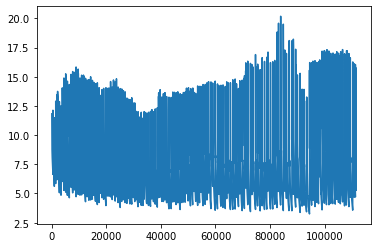

In [168]:
meop.TEMP.plot()

In [170]:
import matplotlib.pyplot as plt

(array([12584., 12600., 12614., 12631., 12645., 12662., 12676.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

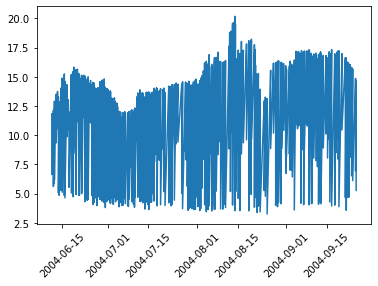

In [172]:
plt.plot(meop.datetime, meop.TEMP)
plt.xticks(rotation=45)

(array([12584., 12591., 12600., 12607., 12614., 12621., 12631., 12638.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

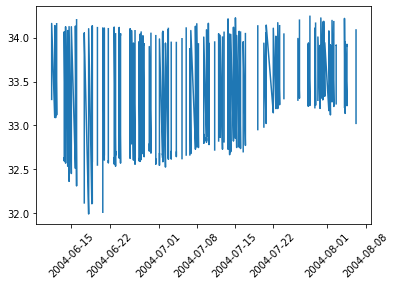

In [173]:
plt.plot(meop.datetime, meop.SAL)
plt.xticks(rotation=45)

In [175]:
meop.DEPTH.describe()

count    111579.000000
mean        330.432259
std         218.029086
min           5.000000
25%         144.000000
50%         313.000000
75%         488.000000
max         989.000000
Name: DEPTH, dtype: float64

In [176]:
meop.groupby(pd.cut(meop.DEPTH, np.arange(0, 501, 20) ))["TEMP"].mean()

DEPTH
(0, 20]       14.544797
(20, 40]      12.257952
(40, 60]       9.658846
(60, 80]       8.638373
(80, 100]      8.314889
(100, 120]     8.026588
(120, 140]     7.825808
(140, 160]     7.713707
(160, 180]     7.595852
(180, 200]     7.440434
(200, 220]     7.272678
(220, 240]     7.082953
(240, 260]     6.891346
(260, 280]     6.664284
(280, 300]     6.428357
(300, 320]     6.196478
(320, 340]     5.973122
(340, 360]     5.773972
(360, 380]     5.594881
(380, 400]     5.431507
(400, 420]     5.291503
(420, 440]     5.161354
(440, 460]     5.048151
(460, 480]     4.955357
(480, 500]     4.856675
Name: TEMP, dtype: float64